In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Define the directory containing the CSV files
directory_path = "/Users/nmcmahon/Desktop/Davis Analysis/pRb_S807_Nathan"  # Replace with your directory path
directory_path2 = "/Users/nmcmahon/Desktop/Davis Analysis/pRb_T252_Jinho"  # Replace with your directory path
output_file = os.path.join(directory_path, "pRb_Nucleus_Intensity_Boxplot.png")



In [3]:
def read_csvs_from_directory_with_subject_id_and_nucleus_filter(directory_path):
    """
    Reads all CSV files in the specified directory, adds a 'subjectID' column with the file name
    (excluding the .csv extension), filters rows based on the 'Nucleus Size' column
    (keeping only rows between the 5th and 95th percentiles), removes rows with 'Sub26' as the subjectID,
    and combines them into a single DataFrame.
    
    Args:
        directory_path (str): Path to the directory containing CSV files.
        
    Returns:
        pd.DataFrame: Combined DataFrame of all CSVs with 'subjectID' and filtered rows.
    """
    dataframes = []
    
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory_path, filename)
            try:
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Add a new column with the file name (excluding '.csv')
                subject_id = filename.rsplit('.csv', 1)[0]
                
                # Add leading zero if subjectID has only 4 characters
                if len(subject_id) == 4 and subject_id.startswith('Sub'):
                    subject_id = f"Sub0{subject_id[3:]}"
                
                df['subjectID'] = subject_id
                
                # Remove rows where 'subjectID' is 'Sub26'
                if subject_id == 'Sub26':
                    print(f"Skipping all rows from {filename} (subjectID: Sub26).")
                    continue
                
                # Check if 'Nucleus Size' column exists
                if 'Nucleus Size' in df.columns:
                    # Calculate 5th and 95th percentiles
                    lower_bound = df['Nucleus Size'].quantile(0.05)
                    upper_bound = df['Nucleus Size'].quantile(0.95)
                    
                    # Filter rows based on these percentiles
                    df = df[(df['Nucleus Size'] >= lower_bound) & (df['Nucleus Size'] <= upper_bound)]
                    print(f"Filtered rows in {filename} based on 'Nucleus Size' percentiles.")
                
                # Append the processed DataFrame to the list
                dataframes.append(df)
                print(f"Successfully loaded and processed: {filename}")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    if dataframes:
        # Combine all DataFrames into one
        combined_df = pd.concat(dataframes, ignore_index=True)
        print("All CSVs have been combined into a single DataFrame with 'subjectID' and filtering.")
        return combined_df
    else:
        print("No CSV files found in the directory.")
        return pd.DataFrame()


In [4]:
# Load the combined and filtered DataFrame
combined_csv_df = read_csvs_from_directory_with_subject_id_and_nucleus_filter(directory_path)

# Apply an additional filtering step for 'pRb Nucleus Intensity Average'
if 'pRb Nucleus Intensity Average' in combined_csv_df.columns:
    # Calculate the 95th percentile
    prb_upper_bound = combined_csv_df['pRb Nucleus Intensity Average'].quantile(0.95)
    
    # Filter rows where 'pRb Nucleus Intensity Average' is above the 95th percentile
    filtered_csv_df = combined_csv_df[combined_csv_df['pRb Nucleus Intensity Average'] <= prb_upper_bound]
    print("Filtered rows with 'pRb Nucleus Intensity Average' above the 95th percentile.")
else:
    print("Column 'pRb Nucleus Intensity Average' not found in the data.")
    filtered_csv_df = combined_csv_df  # No additional filtering applied


Filtered rows in Sub22.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub22.csv
Filtered rows in Sub23.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub23.csv
Filtered rows in Sub35.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub35.csv
Filtered rows in Sub31.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub31.csv
Filtered rows in Sub33.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub33.csv
Filtered rows in Sub32.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub32.csv
Skipping all rows from Sub26.csv (subjectID: Sub26).
Filtered rows in Sub8.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub8.csv
Filtered rows in Sub1.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub1.csv
Filtered rows in Sub17.csv based on 'Nucleus Size' percentiles.
Successfully lo

In [5]:
# Display the first few rows of the combined DataFrame
filtered_csv_df.head()


,ID,Nuc X,Nuc Y Inv,Nucleus Roundness,Nucleus Size,DAPI R1 Cell Intensity Average,DAPI R1 Cytoplasm Intensity Average,DAPI R1 Nucleus Intensity Average,pRb Cell Intensity Average,pRb Cytoplasm Intensity Average,pRb Nucleus Intensity Average,subjectID
0,2,8206.353516,12170.250000,0.861298,48,797.913025,490.360260,2700.895752,1144.727539,1123.568970,1275.645874,Sub22
1,3,8285.935547,12163.752930,0.623034,154,3136.412842,660.556091,10162.058594,1341.387451,1216.505737,1695.759766,Sub22
3,5,8504.060547,12146.686523,0.808173,83,4951.095215,2347.551758,12228.469727,1185.850830,1119.030151,1372.626465,Sub22
4,6,8511.812500,12145.239258,0.715256,96,5814.513672,1186.911987,13478.979492,1303.149048,1187.509399,1494.677124,Sub22
5,8,8107.240723,12142.758789,0.870753,83,3191.002197,701.239319,13720.000000,1200.428589,1118.153809,1548.361450,Sub22


Figure saved as /Users/nmcmahon/Desktop/Davis Analysis/pRb_S807_Nathan/pRb_Nucleus_Intensity_Boxplot.png


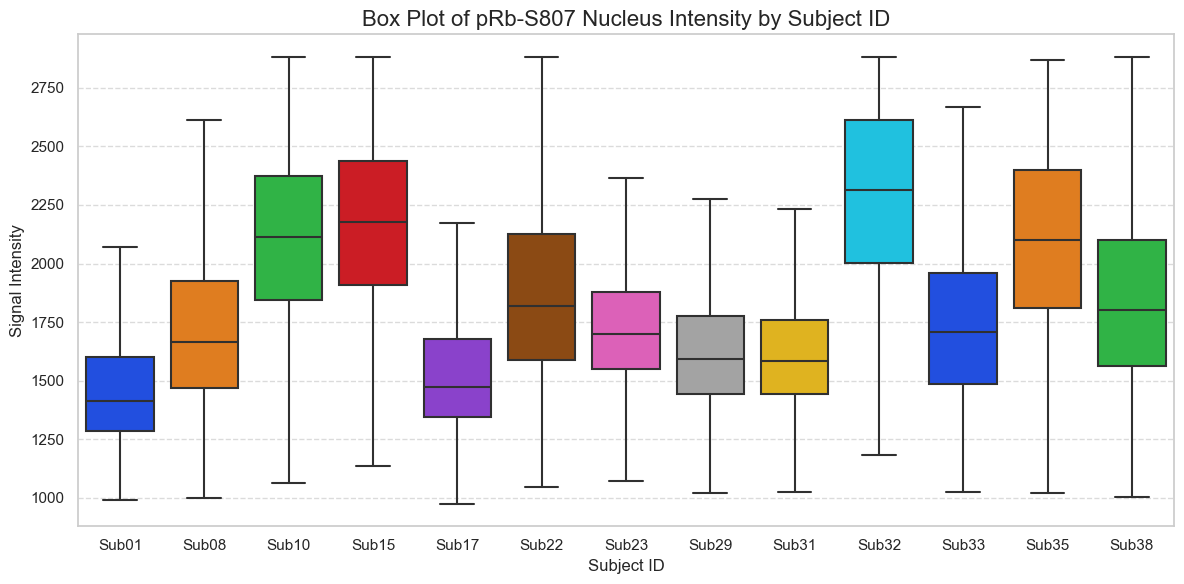

In [6]:
sorted_data = filtered_csv_df.sort_values(by='subjectID')

# Create a boxplot using seaborn
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # Use a clean grid style
sns.boxplot(data=sorted_data, x='subjectID', y='pRb Nucleus Intensity Average', palette="bright", showfliers=False)

# Customize the plot
plt.title('Box Plot of pRb-S807 Nucleus Intensity by Subject ID', fontsize=16)
plt.xlabel('Subject ID', fontsize=12)
plt.ylabel('Signal Intensity', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if there are many subjects
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
# Save the figure as a .png file in the specified directory
plt.savefig(output_file, dpi=300)
print(f"Figure saved as {output_file}")
plt.show()


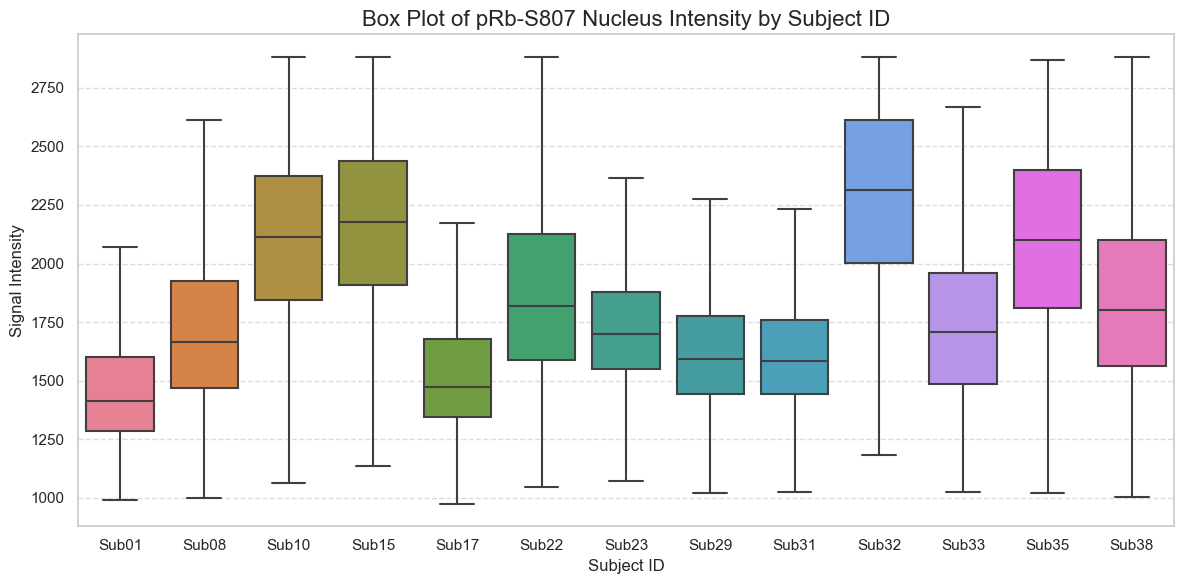

In [7]:
sorted_data = filtered_csv_df.sort_values(by='subjectID')

# Create a boxplot using seaborn
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # Use a clean grid style
sns.boxplot(data=sorted_data, x='subjectID', y='pRb Nucleus Intensity Average', palette="husl", showfliers=False)

# Customize the plot
plt.title('Box Plot of pRb-S807 Nucleus Intensity by Subject ID', fontsize=16)
plt.xlabel('Subject ID', fontsize=12)
plt.ylabel('Signal Intensity', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if there are many subjects
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

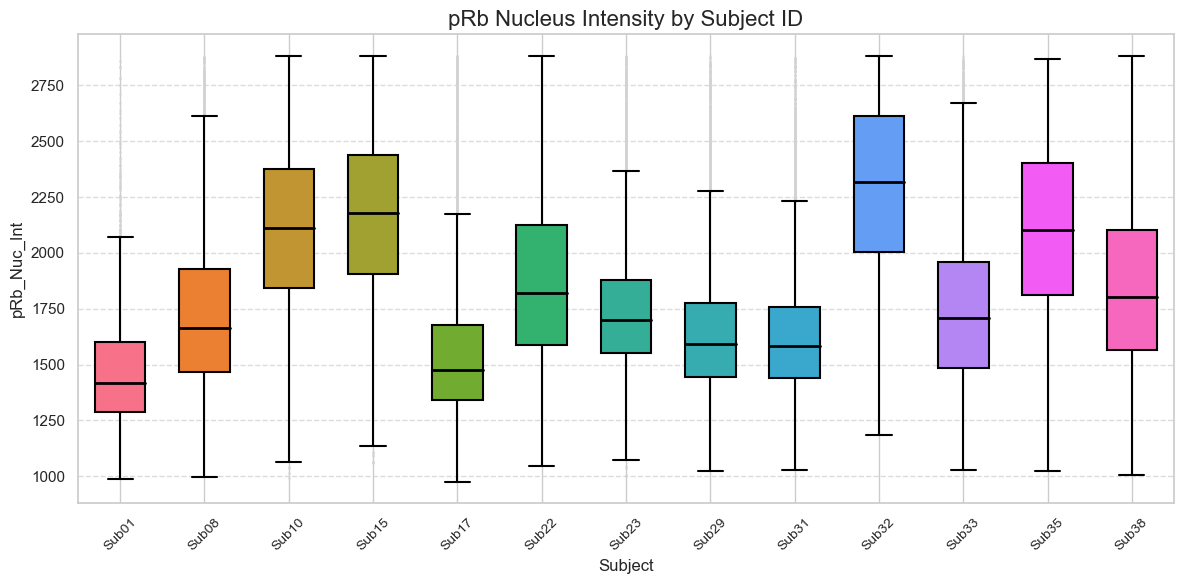

In [19]:
# Set figure size
plt.figure(figsize=(12, 6))

# Group by 'subjectID'
groups = sorted_data.groupby('subjectID')

# Generate a vibrant husl palette
palette = sns.color_palette("husl", n_colors=len(sorted_data['subjectID'].unique()))

# Variables for box plot
positions = np.arange(len(groups))  # Position for each subject on the x-axis
box_data = [group['pRb Nucleus Intensity Average'] for _, group in groups]  # Data for each subject

# Plot the boxplot
box = plt.boxplot(
    box_data,
    positions=positions,
    widths=0.6,
    patch_artist=True,  # Enable coloring of boxes
    showfliers=False,  # Hide default outliers
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2)
)

# Apply vibrant husl colors to each box
for patch, color in zip(box['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

# Overlay outliers as light gray dots
for i, (subject, group) in enumerate(groups):
    y_data = group['pRb Nucleus Intensity Average']
    q1, q3 = np.percentile(y_data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = y_data[(y_data < lower_bound) | (y_data > upper_bound)]
    plt.scatter(
        [i] * len(outliers),  # x positions
        outliers,             # y positions
        color='lightgray',    # Outlier color
        alpha=0.6,            # Transparency
        s=1                  # Size of outlier points
    )

# Customize the plot
plt.title('pRb Nucleus Intensity by Subject ID', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('pRb_Nuc_Int', fontsize=12)
plt.xticks(positions, groups.groups.keys(), rotation=45, fontsize=10)  # Set x-axis labels to subject IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()


In [8]:
output_file2 = os.path.join(directory_path, "pRb_Nucleus_Intensity_Boxplot2.png")

# Adjust layout for better fit


# Save the figure as a .png file in the specified directory
plt.savefig(output_file2, dpi=300)
print(f"Figure saved as {output_file}")


Figure saved as /Users/nmcmahon/Desktop/Davis Analysis/pRb_S807_Nathan/pRb_Nucleus_Intensity_Boxplot.png


<Figure size 640x480 with 0 Axes>

In [9]:
def read_csvs_from_directory_with_subject_id_and_nucleus_filter2(directory_path2):
    """
    Reads all CSV files in the specified directory, adds a 'subjectID' column with the file name
    (excluding the .csv extension), filters rows based on the 'Nucleus Size' column
    (keeping only rows between the 5th and 95th percentiles), removes rows with 'Sub26' as the subjectID,
    and combines them into a single DataFrame.
    
    Args:
        directory_path (str): Path to the directory containing CSV files.
        
    Returns:
        pd.DataFrame: Combined DataFrame of all CSVs with 'subjectID' and filtered rows.
    """
    dataframes = []
    
    for filename in os.listdir(directory_path2):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory_path2, filename)
            try:
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Add a new column with the file name (excluding '.csv')
                subject_id = filename.rsplit('.csv', 1)[0]
                
                # Add leading zero if subjectID has only 4 characters
                if len(subject_id) == 4 and subject_id.startswith('Sub'):
                    subject_id = f"Sub0{subject_id[3:]}"
                
                df['subjectID'] = subject_id
                
                # Remove rows where 'subjectID' is 'Sub26'
                if subject_id == 'Sub26':
                    print(f"Skipping all rows from {filename} (subjectID: Sub26).")
                    continue
                
                # Check if 'Nucleus Size' column exists
                if 'Nucleus Size' in df.columns:
                    # Calculate 5th and 95th percentiles
                    lower_bound = df['Nucleus Size'].quantile(0.05)
                    upper_bound = df['Nucleus Size'].quantile(0.95)
                    
                    # Filter rows based on these percentiles
                    df = df[(df['Nucleus Size'] >= lower_bound) & (df['Nucleus Size'] <= upper_bound)]
                    print(f"Filtered rows in {filename} based on 'Nucleus Size' percentiles.")
                
                # Append the processed DataFrame to the list
                dataframes.append(df)
                print(f"Successfully loaded and processed: {filename}")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    if dataframes:
        # Combine all DataFrames into one
        combined_df = pd.concat(dataframes, ignore_index=True)
        print("All CSVs have been combined into a single DataFrame with 'subjectID' and filtering.")
        return combined_df
    else:
        print("No CSV files found in the directory.")
        return pd.DataFrame()


Filtered rows in Sub22.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub22.csv
Filtered rows in Sub23.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub23.csv
Filtered rows in Sub35.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub35.csv
Filtered rows in Sub31.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub31.csv
Filtered rows in Sub33.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub33.csv
Filtered rows in Sub32.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub32.csv
Skipping all rows from Sub26.csv (subjectID: Sub26).
Filtered rows in Sub8.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub8.csv
Filtered rows in Sub1.csv based on 'Nucleus Size' percentiles.
Successfully loaded and processed: Sub1.csv
Filtered rows in Sub17.csv based on 'Nucleus Size' percentiles.
Successfully lo

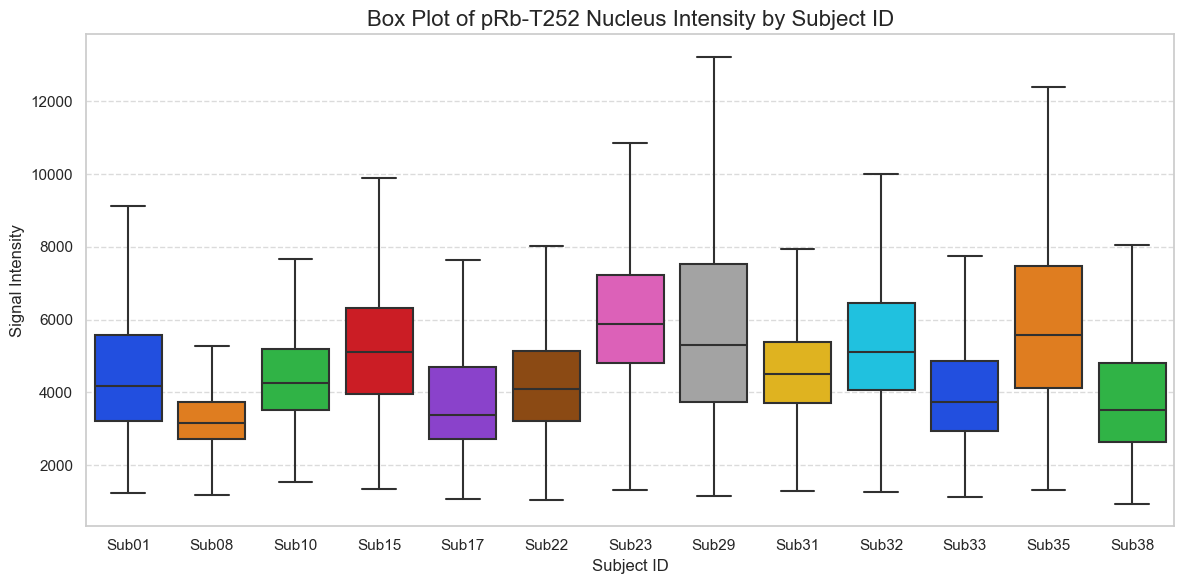

In [10]:
# Load the combined and filtered DataFrame
combined_csv_df2 = read_csvs_from_directory_with_subject_id_and_nucleus_filter(directory_path2)

sorted_data2 = combined_csv_df2.sort_values(by='subjectID')

# Create a boxplot using seaborn
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # Use a clean grid style
sns.boxplot(data=sorted_data2, x='subjectID', y='pRb Nucleus Intensity Average', palette="bright", showfliers=False)

# Customize the plot
plt.title('Box Plot of pRb-T252 Nucleus Intensity by Subject ID', fontsize=16)
plt.xlabel('Subject ID', fontsize=12)
plt.ylabel('Signal Intensity', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if there are many subjects
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
# Save the figure as a .png file in the specified directory
plt.savefig(output_file, dpi=300)
print(f"Figure saved as {output_file}")
plt.show()

Figure saved as /Users/nmcmahon/Desktop/Davis Analysis/pRb_S807_Nathan/pRb_Nucleus_Intensity_Boxplot.png


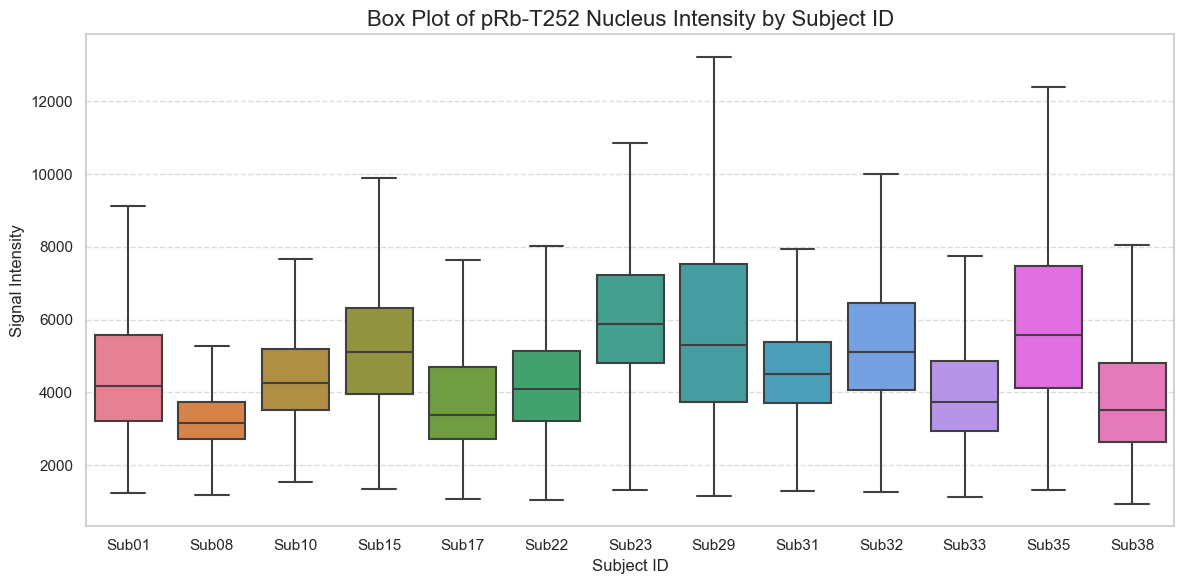

In [11]:

# Create a boxplot using seaborn
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # Use a clean grid style
sns.boxplot(data=sorted_data2, x='subjectID', y='pRb Nucleus Intensity Average', palette="husl", showfliers=False)

# Customize the plot
plt.title('Box Plot of pRb-T252 Nucleus Intensity by Subject ID', fontsize=16)
plt.xlabel('Subject ID', fontsize=12)
plt.ylabel('Signal Intensity', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if there are many subjects
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
# Save the figure as a .png file in the specified directory
plt.savefig(output_file, dpi=300)
print(f"Figure saved as {output_file}")
plt.show()